In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("../data/health_features_new.csv")
df.head()


,RMS,Kurtosis,Label,Severity,File,RMS_norm,Kurtosis_norm,Health
0,0.073764,2.764243,Normal,0,../data/raw/normal/normal_0.mat,0.010162,0.000000,99.390289
1,0.066352,2.930617,Normal,0,../data/raw/normal/normal_1.mat,0.000604,0.008612,99.705431
2,0.066352,2.930617,Normal,0,../data/raw/normal/normal_2.mat,0.000604,0.008612,99.705431
3,0.065884,2.957169,Normal,0,../data/raw/normal/normal_3.mat,0.000000,0.009986,99.700426
4,0.291526,5.395864,IR007,1,../data/raw/IR007/IR007_0.mat,0.290979,0.136212,75.954914


In [4]:
X = df[["RMS", "Kurtosis"]]
y = df["Health"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [8]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")


MAE: 0.661
R² Score: 0.999


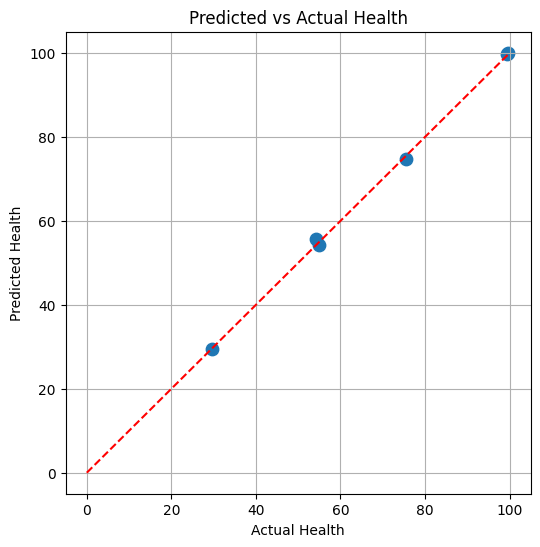

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.plot([0,100], [0,100], 'r--')

plt.xlabel("Actual Health")
plt.ylabel("Predicted Health")
plt.title("Predicted vs Actual Health")

plt.grid(True)
plt.show()


In [10]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coef_df


,Feature,Coefficient
0,RMS,-24.369488
1,Kurtosis,-11.901592
